In [1]:
##Ben Pelto Nov. 2019
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import matplotlib.ticker as ticker
from matplotlib import pylab

path = '/home/pelto/Desktop/ice_thick/'
f_in = 'smooth_window.csv' 

data = pd.read_csv(path + f_in)

# markers = ('o', 's', 'D', '^', 'v', 'p', 'D') #MUST be equal to # of glaciers
# colors = ['#8dd3c7','#ffffb3','#bebada','#fb8072','#80b1d3','#fdb462', '#b3de69'] #MUST be equal to # of glaciers

In [2]:
data[:5]

,glacier,sw,glen a,thick,vol,quad_errors,n_obs,normal,errors_pp,err_m,perc_err,MEA
0,Conrad,NaN,NaN,NaN,opt,2036822.721,823.0,NaN,NaN,NaN,NaN,NaN
1,Conrad,71.0,7.055,99.74,1.326,2805976.000,824.0,1.377624,3405.0,58.4,58.5,47.06
2,Conrad,101.0,7.055,99.90,1.328,2805976.000,824.0,1.000000,3405.0,58.4,58.4,48.73
3,Conrad,151.0,6.444,101.39,1.348,2735637.000,824.0,0.974932,3320.0,57.6,56.8,51.48
4,Conrad,201.0,6.166,103.38,1.362,2692524.000,824.0,0.984240,3268.0,57.2,55.3,53.00


# Single plot: model obs grad versus model default grad (flowline)

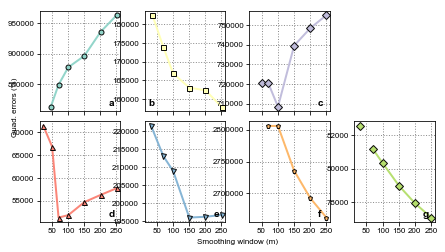

In [3]:
font = {'family' : 'Arial',
        'weight' : 'normal',
        'size'   : 8}

plt.rc('font', **font)
pylab.rcParams['xtick.major.pad']='2'
pylab.rcParams['ytick.major.pad']='2'

# xmax=170
# ymax=170

# Create plot
# fig = plt.figure(figsize=(7,7))#3.34, 3.34))
fig, axarr = plt.subplots(2,4, sharex=True, sharey=False, figsize=(6,3.34))#3.34, 3.34))
# ax = fig.add_subplot(1, 1, 1) 
j, k = 0, 0
# ax = fig.add_subplot(1, 1, 1) 
letter = ['a', 'b', 'c', 'd', 'e', 'f', 'g']
markers = ('o', 's', 'D', '^', 'v', 'p', 'D')
colors = ['#8dd3c7','#ffffb3','#bebada','#fb8072','#80b1d3','#fdb462', '#b3de69']
order = ['Zillmer', 'Nordic', 'Illecillewaet', 'W. Wash', 'Haig', 'Conrad', 'Kokanee']
################
count=0
# for name in np.unique(data['glacier']):
for name in order:
    V=data[data.glacier==name]

    axarr[j,k].plot(V['sw'], V['quad_errors'], alpha=0.95, c=colors[count], markeredgecolor='k', #V['perc_err'],
                marker=markers[count], label=name, markersize='5', linewidth=2.)
    axarr[j,k].grid(linestyle=':', linewidth=1., color='gray', alpha=0.9, zorder=100)
    axarr[0,3].axis('off')
    axarr[j,k].xaxis.set_major_locator(ticker.MultipleLocator(50))
#     if count == 1:
#         axarr[j,k].yaxis.set_major_locator(ticker.MultipleLocator(.5))
    if count == 1:
        axarr[j,k].text(0.05, 0.05, letter[count], transform=axarr[j,k].transAxes,  fontweight='bold', fontsize=10)
    else:
        axarr[j,k].text(0.85, 0.05, letter[count], transform=axarr[j,k].transAxes,  fontweight='bold', fontsize=10)
        
    count+=1

    k += 1

    if count == 3: #changed to 2, 1 worked for 2x2 panel plot
        j += 1
        k = 0
        
# plt.legend(loc='upper left', bbox_to_anchor=(0.01, 0.5), ncol=3)

fig.subplots_adjust(bottom=0.1, top=0.98, hspace=0.1, left=0.075, right=0.99, wspace=0.3)#left=0.07, right=0.9,wspace=0.05, 
fig.text(0.01, 0.68, 'Quad. errors (%)', rotation=90) #'Mean absolute error (%)'
fig.text(0.44, 0.01, 'Smoothing window (m)')

# plt.tight_layout(pad=0.6)
plt.savefig(path + 'JoG/smooth_window_quad_errors_panels.pdf', dpi=300)  #smooth_window_MEA_scatter.pdf', dpi=300)
plt.show()

In [ ]:
d_200 = np.average(data[data['sw'] == 201]['perc_err'])
d_200

In [ ]:
d_250 = np.average(data[data['sw'] == 251]['perc_err'])
d_250

In [ ]:
d_150 = np.average(data[data['sw'] == 151]['perc_err'])
d_150

# 3-panel plot: 
   - model grad vs obs grad (flowline)
   - observations vs obs grad (gpr locations)
   - observations vs model grad (gpr locations)

In [ ]:
# font = {'family' : 'Arial',
#         'weight' : 'normal',
#         'size'   : 8}

# plt.rc('font', **font)

# xmax=180
# ymax=180

# # Create plot
# axes = np.arange(1,3,1)
# fig, axes = plt.subplots(1, 3, figsize=(7, 3.34), sharey=True)

# letter = 'a', 'b', 'c'
# for n in range(3):
#     axes[n].plot(np.arange(0, xmax), np.arange(0, ymax), '--', c='k', alpha=0.75, linewidth=1)
#     axes[n].text(162,8, letter[n], fontweight='bold', fontsize=10)
#     axes[n].set_xlim(0,xmax)
#     axes[n].set_ylim(0,ymax)
#     axes[n].set_xticks(np.arange(0, xmax, 25))
#     axes[n].set_yticks(np.arange(0, ymax, 25))
#     axes[n].grid(linestyle=':', linewidth=1, color='gray', alpha=1.0, zorder=100)

# ### model obs grad versus model default grad (flowline)
  
# z = 1

# for x, y, site, marker, colors in zip(data['Ice_thickness_Obs_grad'], data['Ice_thickness_model_grad'], 
#                               data['Glacier'], markers, colors):
#     axes[0].plot(x,y, alpha=1.0, c=colors, marker=marker, label=site, markersize='8', markeredgecolor='k')
#     z += 1
#     if z >= 8: ## must be one greater than num. of points
#         break
        
# markers = ('o', 's', 'D', '^', 'v', 'p', 'D') 
# colors = ['#8dd3c7','#ffffb3','#bebada','#fb8072','#80b1d3','#fdb462', '#b3de69'] 


# #model obs grad versus observations (gprlocs)
  
# z = 1

# for x, y, site, marker, colors in zip(data['Observed'], data['Ice_thickness_Obs_grad_gprlocs'], 
#                               data['Glacier'], markers, colors):
#     axes[2].plot(x,y, alpha=1.0, c=colors, marker=marker, label=site, markersize='8', markeredgecolor='k')
#     z += 1
#     if z >= 8:
#         break

# markers = ('o', 's', 'D', '^', 'v', 'p', 'D') 
# colors = ['#8dd3c7','#ffffb3','#bebada','#fb8072','#80b1d3','#fdb462', '#b3de69'] 

# ### model grad versus observations (gprlocs)
# z = 1

# for x, y, site, marker, colors in zip(data['Observed'], data['Ice_thickness_model_grad_gprlocs'], 
#                               data['Glacier'], markers, colors):
#     axes[1].plot(x,y, alpha=1.0, c=colors, marker=marker, label=site, markersize='8', markeredgecolor='k')
#     z += 1
#     if z >= 8:
#         break
        
# axes[0].legend(loc=2)

# axes[0].set_xlabel('Modeled ice thickness obs. grad. (m)')
# axes[0].set_ylabel('Modeled ice thickness model grad. (m)')
# axes[2].set_xlabel('Observed ice thickness (m)')
# axes[2].set_ylabel('Modeled ice thickness obs. grad. (m)')
# axes[1].set_xlabel('Observed ice thickness (m)')
# axes[1].set_ylabel('Modeled ice thickness model grad. (m)')

# plt.tight_layout(pad=0.5)
# plt.savefig(path + 'JoG/obs_model_ice_thick_scatter_3panel.pdf', dpi=300)
# plt.show()